In [1]:
import torch
import random
import pickle
import numpy as np

from sklearn.metrics import PrecisionRecallDisplay, precision_score, recall_score, precision_recall_curve

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set seeds for consistent results
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

In [3]:
def load(file):
    with open(file, 'rb') as f:
        return pickle.load(f)
    
def save(data, file):
    with open(file, 'wb') as f:
        pickle.dump(data, f)

In [12]:
def export_prc(name, labels, probs):
    precisions, recalls, thresholds = precision_recall_curve(labels, probs)
    
    t = ' '.join([f'({recall:.8f},{precision:.8f})' for precision,recall in zip(precisions,recalls)])
    with open('results/' + name, 'w') as f:
        f.write(t)
    
    return precisions, recalls, thresholds

In [4]:
manual_data = load('data/manual_data')
display(manual_data)

,theory,bad,sloc,out_min,out_max,out_avg,out_med,eigen_min,eigen_max,eigen_avg,...,between_min,between_max,between_avg,between_med,cluster_min,cluster_max,cluster_avg,cluster_med,frequency,class
0,SPARCv8.Sparc_Types,1,522,0,45246,586.602703,1.0,0.0,9.948794e-01,3.510384e-03,...,0.0,22854.604393,264.498152,0.016026,0.000000,1.333333,0.345397,0.244444,0.001916,0
1,SPARCv8.DetMonad,1,374,0,13,2.551181,2.0,0.0,3.579058e-59,1.007017e-60,...,0.0,564.440847,14.735634,0.000000,0.000000,inf,inf,0.000000,0.002674,0
2,SPARCv8.DetMonadLemmas,1,141,2,8,3.526316,4.0,0.0,2.106747e-59,1.108814e-60,...,0.0,153.564274,5.865392,0.000000,0.085772,1.000000,0.493203,0.333333,0.014184,1
3,SPARCv8.Sparc_State,1,830,0,3316,33.786127,4.0,0.0,5.486730e-29,4.238483e-31,...,0.0,33038.311824,214.520484,0.000000,0.000000,1.000000,0.521197,0.527273,0.000000,0
4,SPARCv8.Sparc_Instruction,1,2601,1,10334,68.335000,4.0,0.0,5.327384e-17,3.368597e-19,...,0.0,4003.676226,43.975623,0.000000,0.000000,1.000000,0.490431,0.533333,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Parity_Game.Strategy,0,473,0,96,15.770115,11.0,0.0,5.788341e-34,1.149212e-35,...,0.0,497.930656,44.970291,14.989146,0.000000,0.900000,0.515411,0.525000,0.000000,0
66,Parity_Game.AttractingStrategy,0,274,0,28,10.771429,10.0,0.0,4.814526e-49,1.866784e-50,...,0.0,251.217196,31.095233,11.411830,0.141026,0.733333,0.488347,0.494505,0.000000,0
67,Parity_Game.Attractor,0,143,4,34,10.791667,8.0,0.0,3.570684e-49,1.950949e-50,...,0.0,37.261905,8.914597,4.717857,0.373684,1.000000,0.620763,0.636797,0.000000,0
68,Parity_Game.WinningStrategy,0,115,7,25,16.545455,18.0,0.0,5.622308e-49,5.111189e-50,...,0.0,66.412432,36.679877,40.738231,0.332016,0.532164,0.433989,0.426316,0.000000,0


# Manual Quality vs. Default Lint Threshold

In [5]:
features = manual_data['frequency']
labels = manual_data['bad']

print(f'Precision: {precision_score(labels, features > 0.01)}')
print(f'Recall: {recall_score(labels, features > 0.01)}')

Precision: 0.9473684210526315
Recall: 0.5142857142857142


# Manual Quality vs Lint Frequency

(array([0.5       , 0.79411765, 0.78787879, 0.8125    , 0.80645161,
        0.8       , 0.79310345, 0.78571429, 0.81481481, 0.80769231,
        0.8       , 0.83333333, 0.86956522, 0.90909091, 0.9047619 ,
        0.95      , 0.94736842, 0.94444444, 0.94117647, 0.9375    ,
        0.93333333, 0.92857143, 0.92307692, 0.91666667, 0.90909091,
        0.9       , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 array([1.        , 0.77142857, 0.74285714, 0.74285714, 0.71428571,
        0.68571429, 0.65714286, 0.62857143, 0.62857143, 0.6       ,
        0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.54285714,
        0.54285714, 0.51428571, 0.48571429, 0.45714286, 0.42857143,
        0.4       , 0.37142857, 0.34285714, 0.31428571, 0.28571429,
        0.25714286, 0.25714286, 0.22857143, 0.2       , 0.17142857,
        0.14285714, 0.11428571, 0.08571429, 0.05714286, 0.02857143,
        0.        ]),
 arr

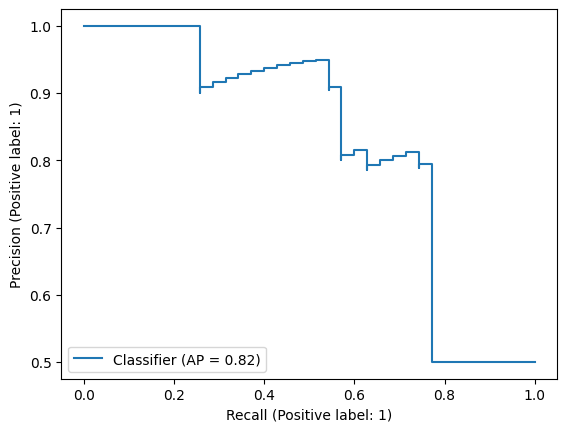

In [13]:
_ = PrecisionRecallDisplay.from_predictions(labels, features)
export_prc('manual_lintfreq', labels, features)

# Manual Quality vs LLM

(array([0.49275362, 0.5       , 0.50746269, 0.51515152, 0.50769231,
        0.5       , 0.50793651, 0.51612903, 0.52459016, 0.53333333,
        0.54237288, 0.53448276, 0.54385965, 0.53571429, 0.54545455,
        0.55555556, 0.53846154, 0.54901961, 0.55102041, 0.5625    ,
        0.55319149, 0.56521739, 0.55555556, 0.56818182, 0.58139535,
        0.5952381 , 0.58536585, 0.575     , 0.58974359, 0.57894737,
        0.56756757, 0.55555556, 0.54285714, 0.55882353, 0.54545455,
        0.53125   , 0.51612903, 0.5       , 0.48275862, 0.46428571,
        0.44444444, 0.42307692, 0.4       , 0.41666667, 0.42857143,
        0.45      , 0.47368421, 0.5       , 0.52941176, 0.5625    ,
        0.6       , 0.64285714, 0.61538462, 0.58333333, 0.63636364,
        0.66666667, 0.75      , 0.85714286, 0.83333333, 0.8       ,
        0.75      , 0.66666667, 1.        , 1.        , 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 0.97058824,
        0.94117647, 0.94117647, 0.94117647, 0.

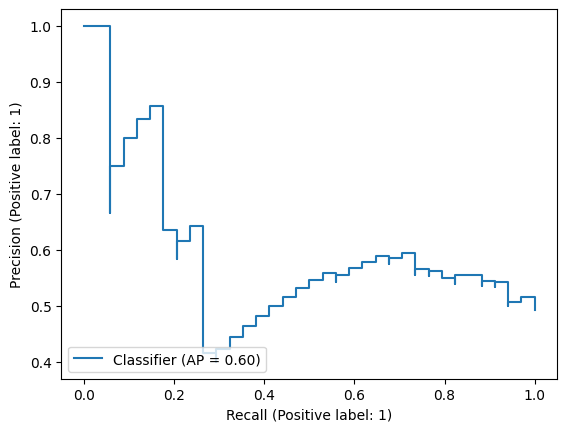

In [14]:
quality_data = load('data/quality_data')
llm_features = (10.0 - quality_data['score']) / 10.0
llm_labels = quality_data['bad']

_ = PrecisionRecallDisplay.from_predictions(llm_labels, llm_features)
export_prc('manual_llm', llm_labels, llm_features)